3. What's the trend of these risk factors over time for continents?

In [3]:
import pandas as pd
import altair as alt
clean_data = pd.read_csv("../data/clean_number-of-deaths-by-risk-factor.csv")

In [2]:
url = 'https://raw.githubusercontent.com/STAT545-UBC/STAT545-UBC.github.io/master/gapminderDataFiveYear.txt'
gapminder = pd.read_csv(url, delimiter="\t")


In [3]:
clean_data.drop(columns=['code' , 'unsafe_water_source', 'poor_sanitation','no_access_to_handwashing_facility','non-exclusive_breastfeeding','discontinued_breastfeeding','child_wasting','child_stunting','low_birth_weight','secondhand_smoke','alcohol_use', 'drug_use', 'diet_low_in_fruits','diet_low_in_vegetables', 'unsafe_sex', 'low_physical_activity' ,'iron_deficiency', 'zinc_deficiency', 'vitamin-a_deficiency','low_bone_mineral_density','outdoor_air_pollution','indoor_air_pollution'], axis=1, inplace=True)

In [4]:
clean_data = clean_data.merge(gapminder[['country','continent']], left_on='country', right_on = 'country')

In [5]:
clean_data.head()

,country,year,high_blood_sugar,obesity,high_blood_pressure,smoking,air_pollution_outdoor_&_indoor,continent
0,Afghanistan,1990,21610.06616,7701.58128,28183.98335,6393.667372,26598.00673,Asia
1,Afghanistan,1990,21610.06616,7701.58128,28183.98335,6393.667372,26598.00673,Asia
2,Afghanistan,1990,21610.06616,7701.58128,28183.98335,6393.667372,26598.00673,Asia
3,Afghanistan,1990,21610.06616,7701.58128,28183.98335,6393.667372,26598.00673,Asia
4,Afghanistan,1990,21610.06616,7701.58128,28183.98335,6393.667372,26598.00673,Asia


In [6]:
grouped_data = clean_data.groupby(['continent','year']).sum().reset_index()
grouped_data


,continent,year,high_blood_sugar,obesity,high_blood_pressure,smoking,air_pollution_outdoor_&_indoor
0,Africa,1990,3.644594e+06,2.001687e+06,5.779287e+06,2.586857e+06,7.133013e+06
1,Africa,1991,3.753047e+06,2.082043e+06,5.906983e+06,2.645391e+06,7.178302e+06
2,Africa,1992,3.882773e+06,2.175435e+06,6.062517e+06,2.713961e+06,7.253962e+06
3,Africa,1993,4.027312e+06,2.283576e+06,6.243835e+06,2.790839e+06,7.336856e+06
4,Africa,1994,4.172376e+06,2.401531e+06,6.417581e+06,2.871064e+06,7.404894e+06
...,...,...,...,...,...,...,...
135,Oceania,2013,2.504562e+05,2.449125e+05,3.298832e+05,2.809077e+05,6.664310e+04
136,Oceania,2014,2.586377e+05,2.542011e+05,3.409200e+05,2.877690e+05,6.575191e+04
137,Oceania,2015,2.667836e+05,2.624945e+05,3.512300e+05,2.927479e+05,6.649890e+04
138,Oceania,2016,2.755509e+05,2.709310e+05,3.631816e+05,2.977382e+05,6.416932e+04


In [7]:
grouped_data.to_csv('../data/clean_data_line_plot.csv',index = None)

In [4]:
factors_data = pd.read_csv('../data/clean_data_line_plot.csv')

In [5]:
#change to percentage
factors_data.iloc[:,2:] = factors_data.iloc[:,2:].div(factors_data.iloc[:,2:].sum(axis=1), axis=0)

In [9]:
#factors_data.iloc[:,2:] = factors_data.iloc[:,2:]/1_000_000

In [6]:
selection = alt.selection_single();

def line_graph(factor_name='high_blood_sugar', data=factors_data):
    '''
    plot the interactive line graph 
    '''
    line = alt.Chart(data).mark_line(point=True).add_selection(selection
).encode(
    alt.X("year:N", axis=alt.Axis(labelAngle=45)),
    alt.Y("{}:Q".format(factor_name),title="Percentage of death over total death",
          axis=alt.Axis(format='%') ),
    tooltip = ['year:N','continent:N', 
               alt.Tooltip('{}:Q'.format(factor_name), format = ".2%",
                          title="percentage of death")],
    color = alt.condition(selection, 'continent:N', alt.value('grey')),
    opacity = alt.condition(selection, alt.value(0.9), alt.value(0.2))
).properties(
    title="Trend of death due to {} over time , 1990 - 2017".format(factor_name.replace("_"," ")),
    width=800,
    height=350).configure_title(fontSize=25
    ).configure_axis(
    labelFontSize=15,
    titleFontSize=20
)
    return line 

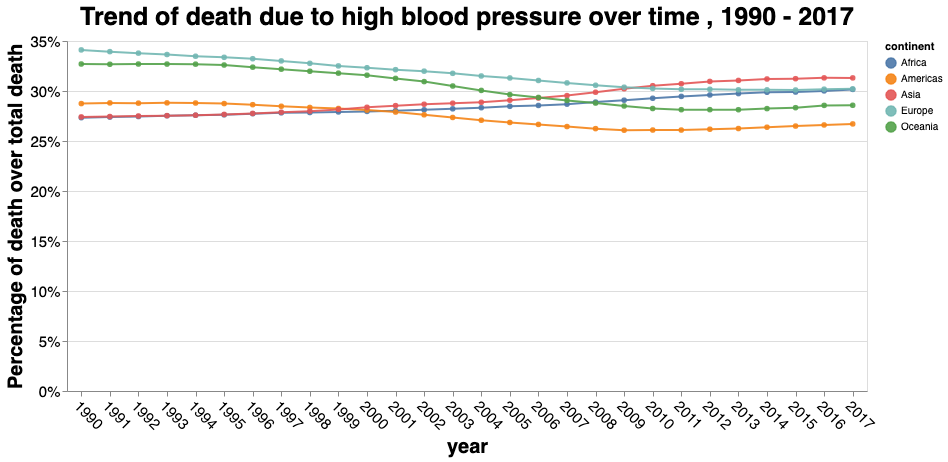

In [7]:
line_graph("high_blood_pressure")

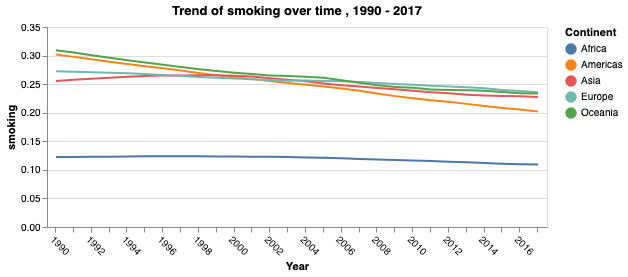

In [22]:
# select a point for which to provide details-on-demand
label = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

# define our base line chart of stock prices
base = alt.Chart().mark_line().encode(
    alt.X('year:O', title = 'Year', axis=alt.Axis(labelAngle=45)),
    alt.Y('smoking', title = 'smoking'),
    alt.Color('continent:N', title = 'Continent'
             )
)

alt.layer(
    base, # base line chart
    
    # add a rule mark to serve as a guide line
    alt.Chart().mark_rule(color='#aaa').encode(
        x='year:O'
    ).transform_filter(label),
    
    # add circle marks for selected time points, hide unselected points
    base.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),

    # add white stroked text to provide a legible background for labels
    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='smoking:Q'
    ).transform_filter(label),

    # add text labels for life expectancy
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='smoking:Q'
    ).transform_filter(label),

    # Add the data here
    data = factors_data
).properties(
    width=500,
    height=200,
    title='Trend of smoking over time , 1990 - 2017'
)